In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-cluster0/model_cluster0.h5
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3178).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3561).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (900).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1148).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (268).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-

In [2]:
df = pd.read_csv('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv')
df

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [13]:
df['Class'].value_counts()

Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: Class, dtype: int64

In [33]:
df['target'].value_counts()

1    5077
0    3709
3    2283
2    1377
Name: target, dtype: int64

In [8]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import os
from sklearn.ensemble import RandomForestClassifier

In [4]:
image_size = (125, 125)
tumor_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor-'
cyst_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst-'
stone_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone-'
normal_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal-'

In [5]:
def load_images_labels(image_size):
    images, labels = [], []
    for i in range(len(df)):
        if df['path'].iloc[i].split('/')[-2] == 'TUMOR':
            #tumour
            full_path = tumor_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'CYST':
            #tumour
            full_path = cyst_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'STONE':
            #tumour
            full_path = stone_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'NORMAL':
            #tumour
            full_path = normal_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [6]:
images, labels = load_images_labels(image_size)

In [8]:
print(images.shape, labels.shape)

(12446, 125, 125, 3) (12446,)


In [9]:
# Prepare the data for clustering and logistic regression
X = images.reshape(len(images), -1)
y = labels

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pred = kmeans.fit_predict(X)

# Print the number of images in each cluster
unique_labels, counts = np.unique(labels_pred, return_counts=True)
for i in range(len(unique_labels)):
    print(f"Cluster {unique_labels[i]}: {counts[i]} images")

Cluster 0: 4237 images
Cluster 1: 8209 images


In [9]:
X = np.reshape(images, (len(images), -1))
y = labels

print(X.shape, y.shape)

# Prepare the data for cluster 0
X_cluster0 = X[labels_pred == 0]
y_cluster0 = y[labels_pred == 0]

# Split the data into training and validation sets for cluster 0
X_val_cluster0, X_test_cluster0, y_val_cluster0, y_test_cluster0 = train_test_split(X_cluster0, y_cluster0, test_size=0.1, random_state=42)
X_train_cluster0, X_val_cluster0, y_train_cluster0, y_val_cluster0 = train_test_split(X_val_cluster0, y_val_cluster0, test_size=0.1, random_state=42)

# Prepare the data for cluster 1
X_cluster1 = X[labels_pred == 1]
y_cluster1 = y[labels_pred == 1]

# Split the data into training and validation sets for cluster 1
X_val_cluster1, X_test_cluster1, y_val_cluster1, y_test_cluster1 = train_test_split(X_cluster1, y_cluster1, test_size=0.1, random_state=42)
X_train_cluster1, X_val_cluster1, y_train_cluster1, y_val_cluster1 = train_test_split(X_val_cluster1, y_val_cluster1, test_size=0.1, random_state=42)


(12446, 46875) (12446,)


**CNN**

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# reshape input data for cluster 0
X_train_cluster0 = X_train_cluster0.reshape((-1, 125, 125, 3))
X_val_cluster0 = X_val_cluster0.reshape((-1, 125, 125, 3))
X_test_cluster0 = X_test_cluster0.reshape((-1, 125, 125, 3))

In [30]:
# # Build the model
model_cluster0 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3), data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(64, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(128, (3, 3), activation='relu', data_format="channels_last", name='last_conv_layer'),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes in the dataset
])

# # Compile the model
model_cluster0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# # Train the model
history_cluster0 = model_cluster0.fit(X_train_cluster0, y_train_cluster0,
                    epochs=50,
                    validation_data=(X_val_cluster0, y_val_cluster0),
                    callbacks=[early_stopping])

# # Evaluate the model on the test set
test_loss_cluster0, test_accuracy_cluster0 = model_cluster0.evaluate(X_test_cluster0, y_test_cluster0)
print(f"Test loss: {test_loss_cluster0:.4f}")
print(f"Test accuracy: {test_accuracy_cluster0:.4f}")

# # Make predictions on the test set
y_pred_cluster0 = model_cluster0.predict(X_test_cluster0)
y_pred_cluster0 = np.argmax(y_pred_cluster0, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_cluster0, y_pred_cluster0)

# Print the confusion matrix
print(cm)

Epoch 1/50
108/108 [==============================] - 4s 22ms/step - loss: 0.5342 - accuracy: 0.7867 - val_loss: 0.0494 - val_accuracy: 0.9921
Epoch 2/50
108/108 [==============================] - 2s 20ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3/50
108/108 [==============================] - 2s 19ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0245 - val_accuracy: 0.9948
Epoch 4/50
108/108 [==============================] - 2s 20ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 7.0819e-05 - val_accuracy: 1.0000
Epoch 5/50
108/108 [==============================] - 2s 19ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.9787e-05 - val_accuracy: 1.0000
Epoch 6/50
108/108 [==============================] - 2s 20ms/step - loss: 5.2016e-04 - accuracy: 1.0000 - val_loss: 6.4607e-06 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0139 - accuracy: 0.9953
Test loss: 0.0139
Test accur

In [10]:
# reshape input data for cluster 1
X_train_cluster1 = X_train_cluster1.reshape((-1, 125, 125, 3))
X_val_cluster1 = X_val_cluster1.reshape((-1, 125, 125, 3))
X_test_cluster1 = X_test_cluster1.reshape((-1, 125, 125, 3))

In [13]:
# Build the model
model_cluster1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3), data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(64, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(128, (3, 3), activation='relu', data_format="channels_last", name='last_conv_layer'),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes in the dataset
])

# Compile the model
model_cluster1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# Train the model
history_cluster1 = model_cluster1.fit(X_train_cluster1, y_train_cluster1,
                    epochs=50,
                    validation_data=(X_val_cluster1, y_val_cluster1),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_cluster1, test_accuracy_cluster1 = model_cluster1.evaluate(X_test_cluster1, y_test_cluster1)
print(f"Test loss: {test_loss_cluster1:.4f}")
print(f"Test accuracy: {test_accuracy_cluster1:.4f}")

# Make predictions on the test set
y_pred_cluster1 = model_cluster1.predict(X_test_cluster1)
y_pred_cluster1 = np.argmax(y_pred_cluster1, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_cluster1, y_pred_cluster1)

# Print the confusion matrix
print(cm)

Epoch 1/50
208/208 [==============================] - 20s 24ms/step - loss: 0.3156 - accuracy: 0.8809 - val_loss: 0.0359 - val_accuracy: 0.9905
Epoch 2/50
208/208 [==============================] - 4s 20ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 3/50
208/208 [==============================] - 4s 20ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 1.0558e-04 - val_accuracy: 1.0000
Epoch 4/50
208/208 [==============================] - 4s 20ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 8.5231e-05 - val_accuracy: 1.0000
Epoch 5/50
208/208 [==============================] - 4s 19ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 9.4176e-04 - val_accuracy: 1.0000
Epoch 6/50
208/208 [==============================] - 4s 20ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 5.9088e-04 - val_accuracy: 1.0000
Epoch 7/50
208/208 [==============================] - 4s 20ms/step - loss: 3.7658e-04 - accuracy: 0.9998 - val_loss: 3.5091e-

In [14]:
model_cluster1.save('model_cluster1.h5')

Gradcam

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
IMG_SIZE = image_size
NUM_CLASSES = 4
LAST_CONV_LAYER_NAME = 'last_conv_layer'

In [19]:
def get_img_array(img_path, size=(125, 125, 3)):
    # `img` is a PIL image of size 224, 224, 3
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, LAST_CONV_LAYER_NAME, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(LAST_CONV_LAYER_NAME).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the output class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [15]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

**Heatmap for cluster 0**

Class 0

In [34]:
# Prepare image
#img_array = preprocess_input(get_img_array(img_path, size=IMG_SIZE))

# Remove last layer's softmax
model_cluster0.layers[-1].activation = None

# Print what the top predicted class is
preds = model_cluster0.predict(X_test_cluster0)
preds.shape
#print("Predicted:", decode_predictions(preds, top=2)[0])

14/14 [==============================] - 0s 7ms/step


(424, 4)

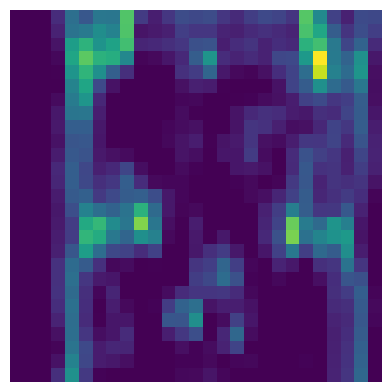

In [35]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster0, model_cluster0, LAST_CONV_LAYER_NAME, pred_index=0)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [36]:
np.savetxt('heatmap_cluster0_predindex_0.csv', heatmap, delimiter=",")

In [52]:
img_path = cyst_path + " (27).jpg"

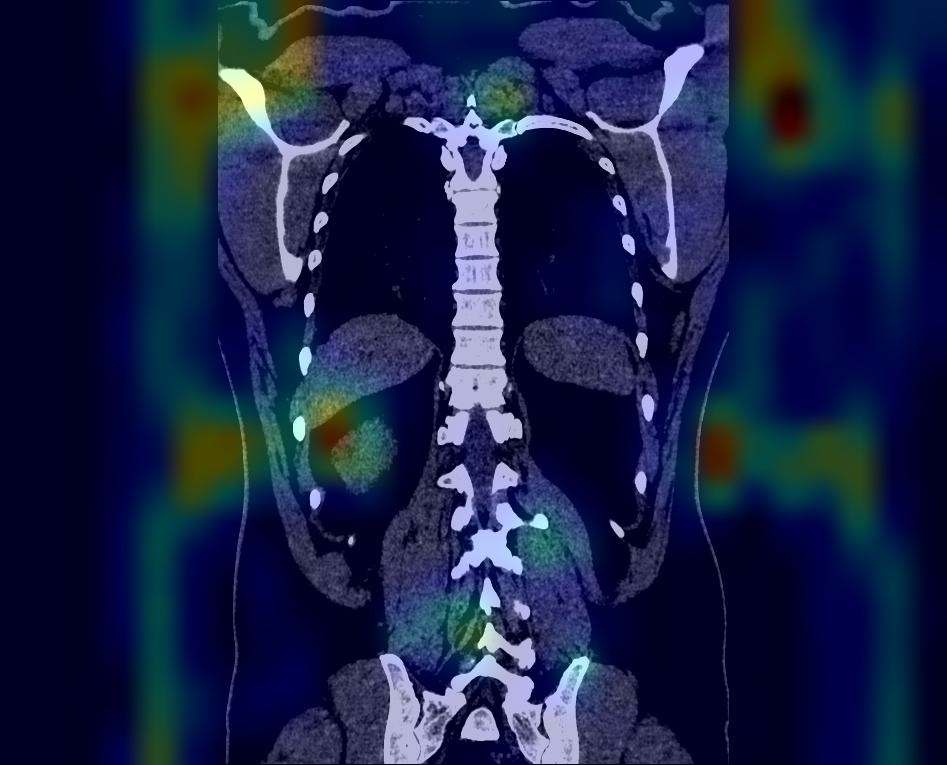

In [53]:
# 285 index corresponds to a cat class "Egyptian cat" in the Imagenet dataset
#heatmap = make_gradcam_heatmap(img_array, model, LAST_CONV_LAYER_NAME, pred_index=285)

save_and_display_gradcam(img_path, heatmap)

In [10]:
heatmap_df = pd.read_csv('/kaggle/input/heatmap-0/heatmap_cluster0_predindex_0.csv', header=None)

In [14]:
heatmap = heatmap_df.values

In [17]:
img_path = normal_path + " (35).jpg"

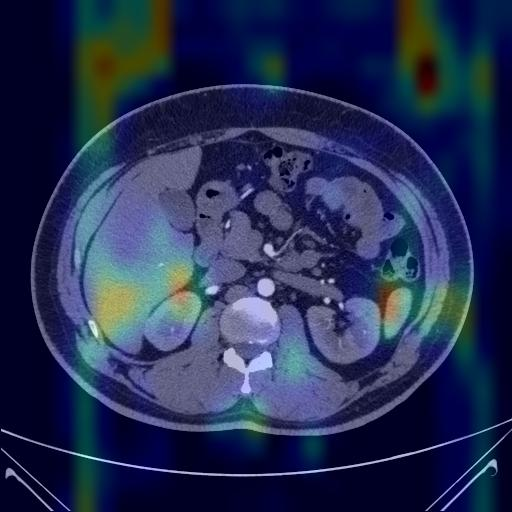

In [20]:
save_and_display_gradcam(img_path, heatmap)

Class 1

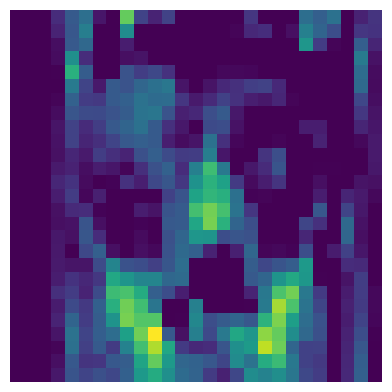

In [54]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster0, model_cluster0, LAST_CONV_LAYER_NAME, pred_index=1)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [55]:
np.savetxt('heatmap_cluster0_predindex_1.csv', heatmap, delimiter=",")

In [56]:
img_path = normal_path + " (177).jpg"

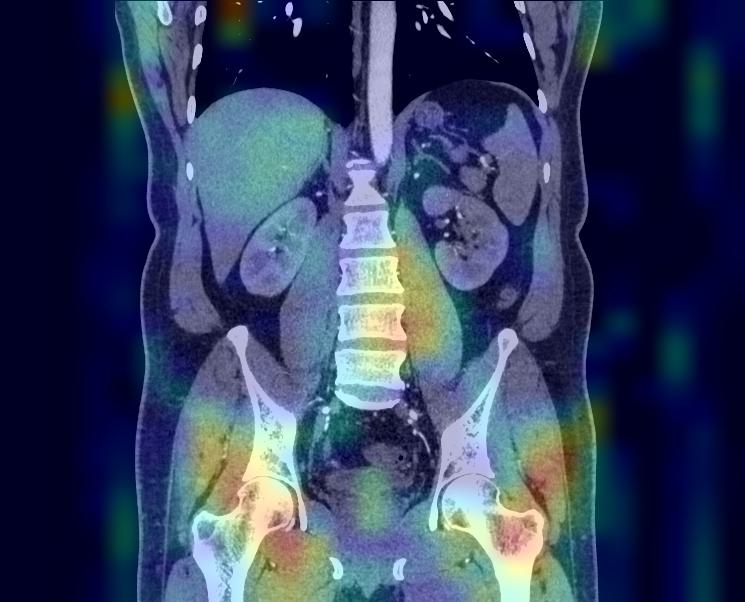

In [58]:
save_and_display_gradcam(img_path, heatmap)

Class 2

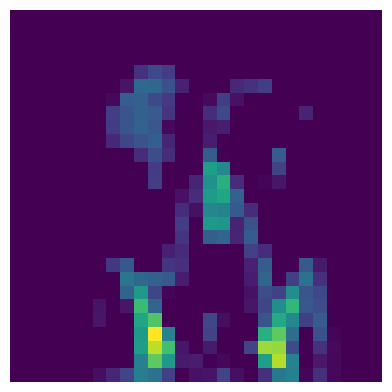

In [59]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster0, model_cluster0, LAST_CONV_LAYER_NAME, pred_index=2)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [60]:
np.savetxt('heatmap_cluster0_predindex_2.csv', heatmap, delimiter=",")

In [63]:
img_path = stone_path + " (107).jpg"

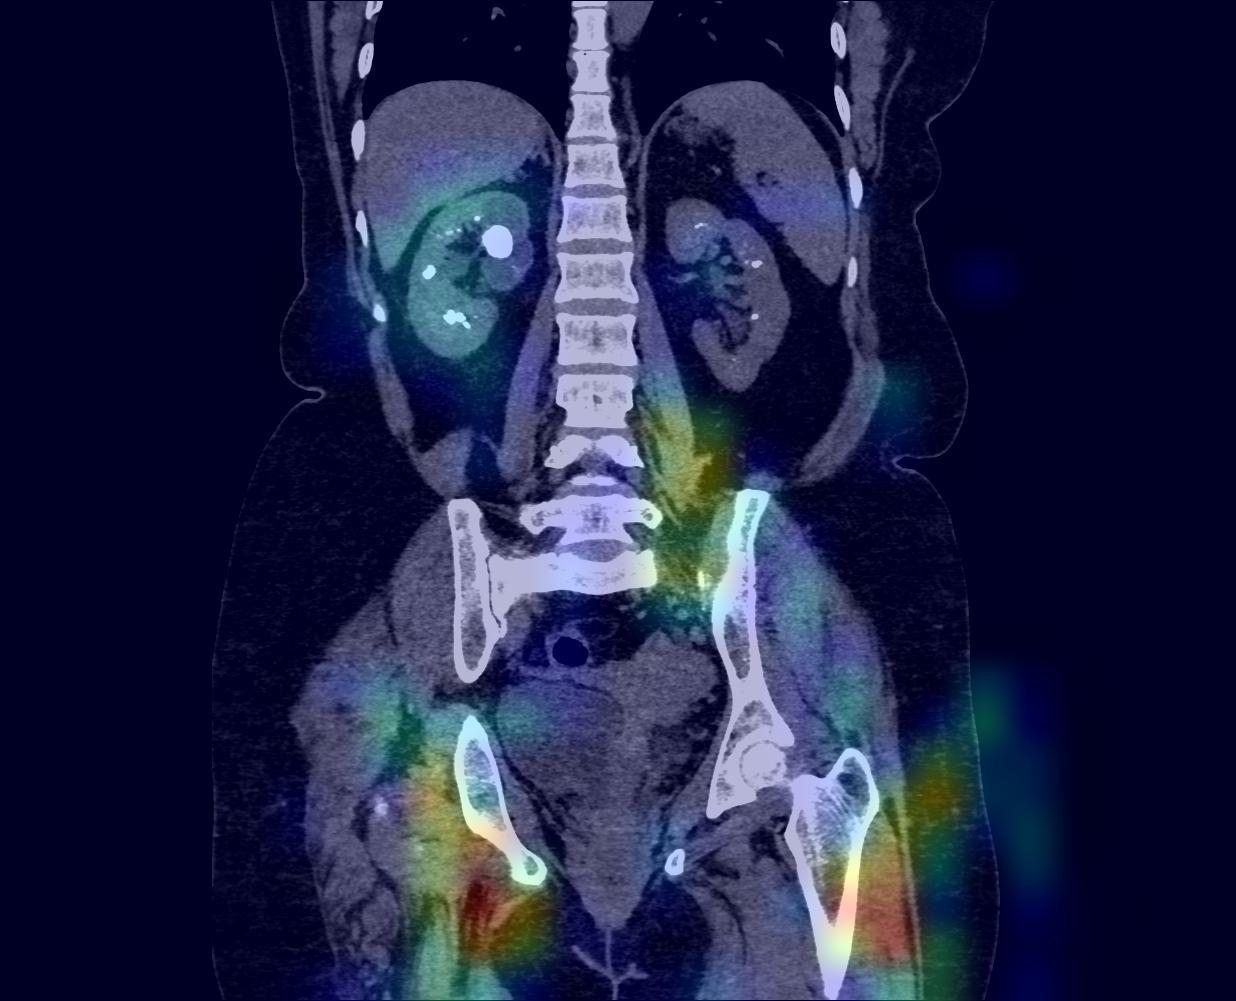

In [64]:
save_and_display_gradcam(img_path, heatmap)

Class 3

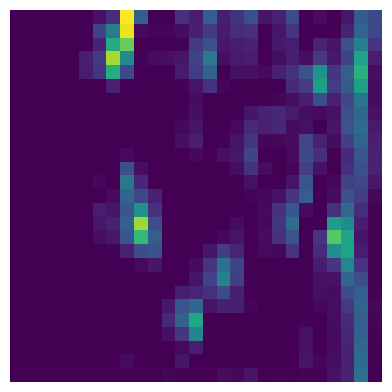

In [65]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster0, model_cluster0, LAST_CONV_LAYER_NAME, pred_index=3)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [66]:
np.savetxt('heatmap_cluster0_predindex_3.csv', heatmap, delimiter=",")

In [74]:
img_path = tumor_path + " (228).jpg"

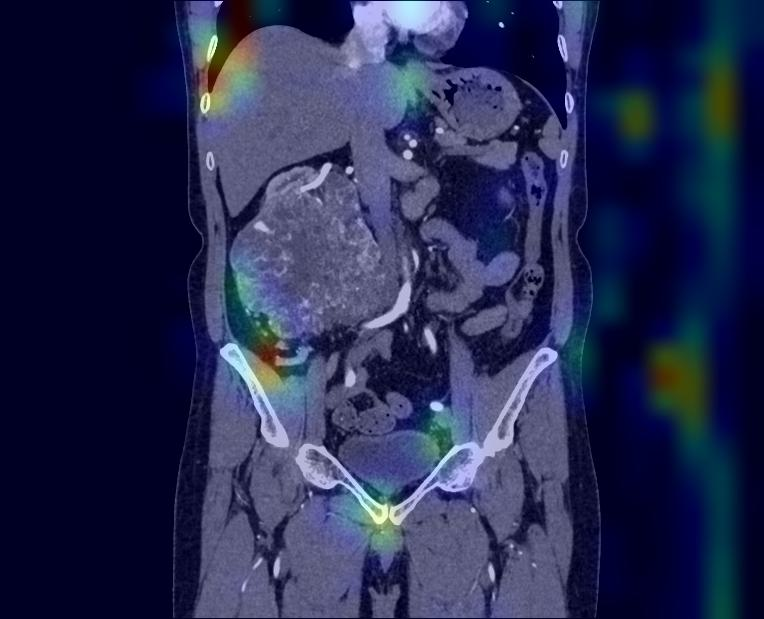

In [75]:
save_and_display_gradcam(img_path, heatmap)

**Heatmap for cluster 1**

In [15]:
# Prepare image
#img_array = preprocess_input(get_img_array(img_path, size=IMG_SIZE))

# Remove last layer's softmax
model_cluster1.layers[-1].activation = None

# Print what the top predicted class is
preds = model_cluster1.predict(X_test_cluster1)
preds.shape
#print("Predicted:", decode_predictions(preds, top=2)[0])

26/26 [==============================] - 0s 7ms/step


(821, 4)

Class 0

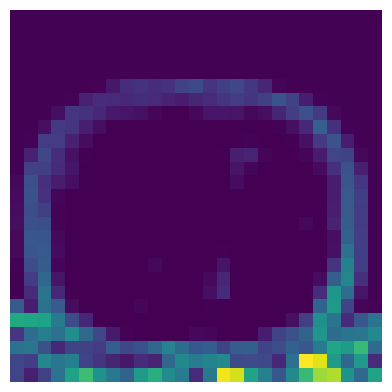

In [28]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster1, model_cluster1, LAST_CONV_LAYER_NAME, pred_index=0)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [29]:
np.savetxt('heatmap_cluster1_predindex_0.csv', heatmap, delimiter=",")

In [25]:
img_path = cyst_path + " (275).jpg"

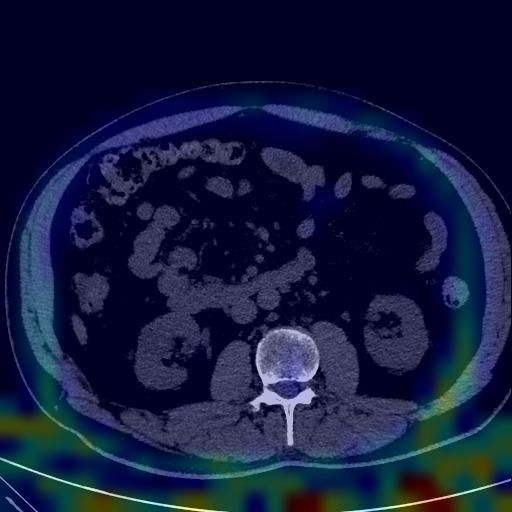

In [26]:
save_and_display_gradcam(img_path, heatmap)

Class 1

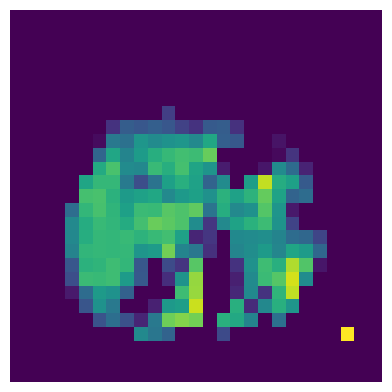

In [34]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster1, model_cluster1, LAST_CONV_LAYER_NAME, pred_index=1)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [35]:
np.savetxt('heatmap_cluster1_predindex_1.csv', heatmap, delimiter=",")

In [38]:
img_path = normal_path + " (35).jpg"

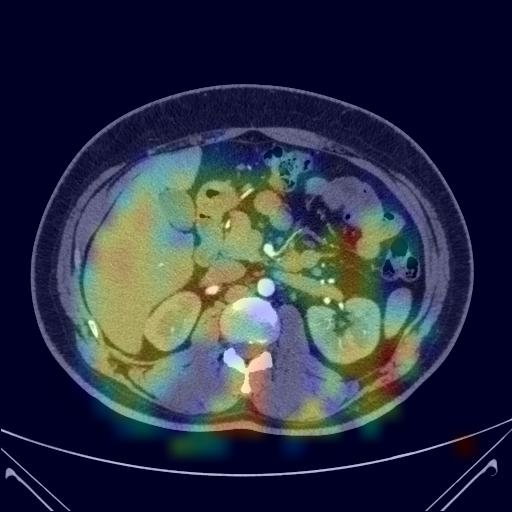

In [39]:
save_and_display_gradcam(img_path, heatmap)

Class 2

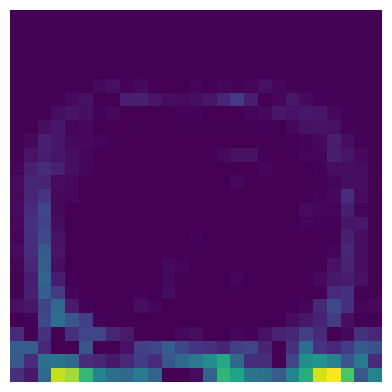

In [40]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster1, model_cluster1, LAST_CONV_LAYER_NAME, pred_index=2)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [41]:
np.savetxt('heatmap_cluster1_predindex_2.csv', heatmap, delimiter=",")

In [44]:
img_path = stone_path + " (327).jpg"

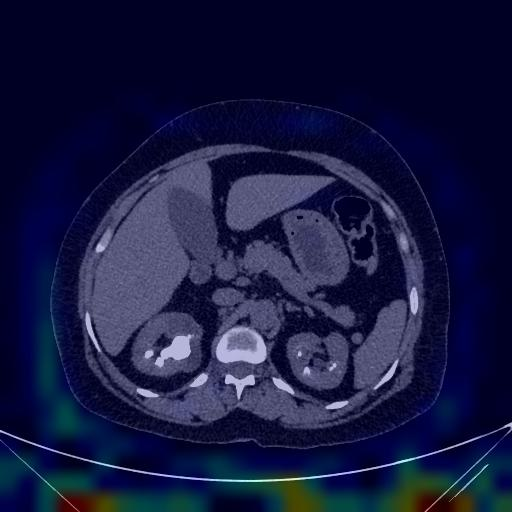

In [45]:
save_and_display_gradcam(img_path, heatmap)

Class 3

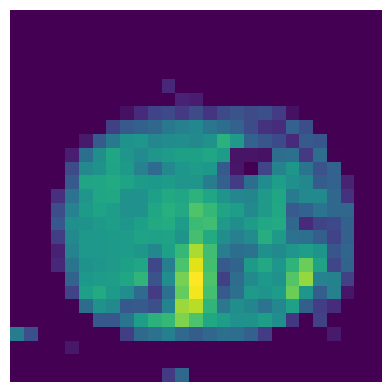

In [46]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(X_test_cluster1, model_cluster1, LAST_CONV_LAYER_NAME, pred_index=3)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

In [47]:
np.savetxt('heatmap_cluster1_predindex_3.csv', heatmap, delimiter=",")

In [48]:
img_path = tumor_path + " (315).jpg"

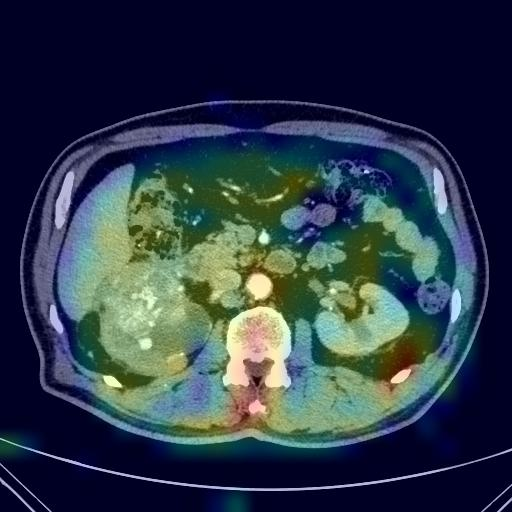

In [49]:
save_and_display_gradcam(img_path, heatmap)